In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import cv2
from gc import collect
from tqdm import tqdm
from pathlib import Path

import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
root = Path.cwd().parent
data = root / 'training' / 'data'

In [4]:
df = pd.read_csv(data / 'train.csv')
df.head()

,kingdom,name,family,phylum,order,genus,class,file_name,height,width,dset,dataset,file_path,specific_epithet,class_id
0,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8d841f576d05e05f0b4b5513d549630a.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
1,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,f84f23fe93f3fde53f7193e3cc08d473.jpg,600,800,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
2,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,dabc337065c65a0ed19707c4a595bcb1.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
3,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8980532c8a1ef146bd3ed8d54f362b76.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
4,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,2d3e29631fa00733061111743ceb734c.jpg,600,800,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316


In [5]:
print(df[df['set'] == 'train']['class_id'].value_counts())
#print(df[df['set'] == 'val']['class_id'].value_counts())

class_id
22     633
432    527
373    427
105    419
231    379
      ... 
36       9
294      9
446      9
372      8
239      7
Name: count, Length: 467, dtype: int64


<Axes: ylabel='count'>

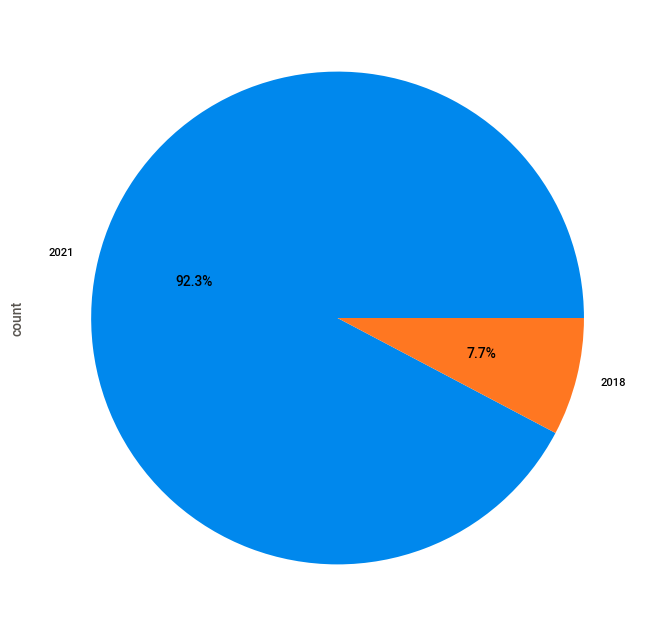

In [6]:
df['dataset'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

In [5]:
df

,kingdom,name,family,phylum,order,genus,class,file_name,height,width,dset,dataset,file_path,specific_epithet,class_id
0,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8d841f576d05e05f0b4b5513d549630a.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
1,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,f84f23fe93f3fde53f7193e3cc08d473.jpg,600,800,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
2,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,dabc337065c65a0ed19707c4a595bcb1.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
3,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,8980532c8a1ef146bd3ed8d54f362b76.jpg,800,600,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
4,Fungi,Phallus indusiatus,Phallaceae,Basidiomycota,Phallales,Phallus,Agaricomycetes,2d3e29631fa00733061111743ceb734c.jpg,600,800,train,2018,/home/broug/Desktop/Mushroom-Classifier/traini...,indusiatus,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103392,Fungi,Tremella mesenterica,Tremellaceae,Basidiomycota,Tremellales,Tremella,Tremellomycetes,51f13b0b-f4f7-46ed-9e53-4d0c63ddad6b.jpg,375,500,val,2021,/home/broug/Desktop/Mushroom-Classifier/traini...,mesenterica,435
103393,Fungi,Tremella mesenterica,Tremellaceae,Basidiomycota,Tremellales,Tremella,Tremellomycetes,294cf8dc-bfaa-45b7-a7a8-205d1a22e33d.jpg,375,500,val,2021,/home/broug/Desktop/Mushroom-Classifier/traini...,mesenterica,435
103394,Fungi,Tremella mesenterica,Tremellaceae,Basidiomycota,Tremellales,Tremella,Tremellomycetes,b3b8cb90-d5d6-4118-826f-d69c6803a11a.jpg,341,500,val,2021,/home/broug/Desktop/Mushroom-Classifier/traini...,mesenterica,435
103395,Fungi,Tremella mesenterica,Tremellaceae,Basidiomycota,Tremellales,Tremella,Tremellomycetes,f38f1edd-34f2-4e8d-aaeb-c95ed22dd1ca.jpg,500,410,val,2021,/home/broug/Desktop/Mushroom-Classifier/traini...,mesenterica,435


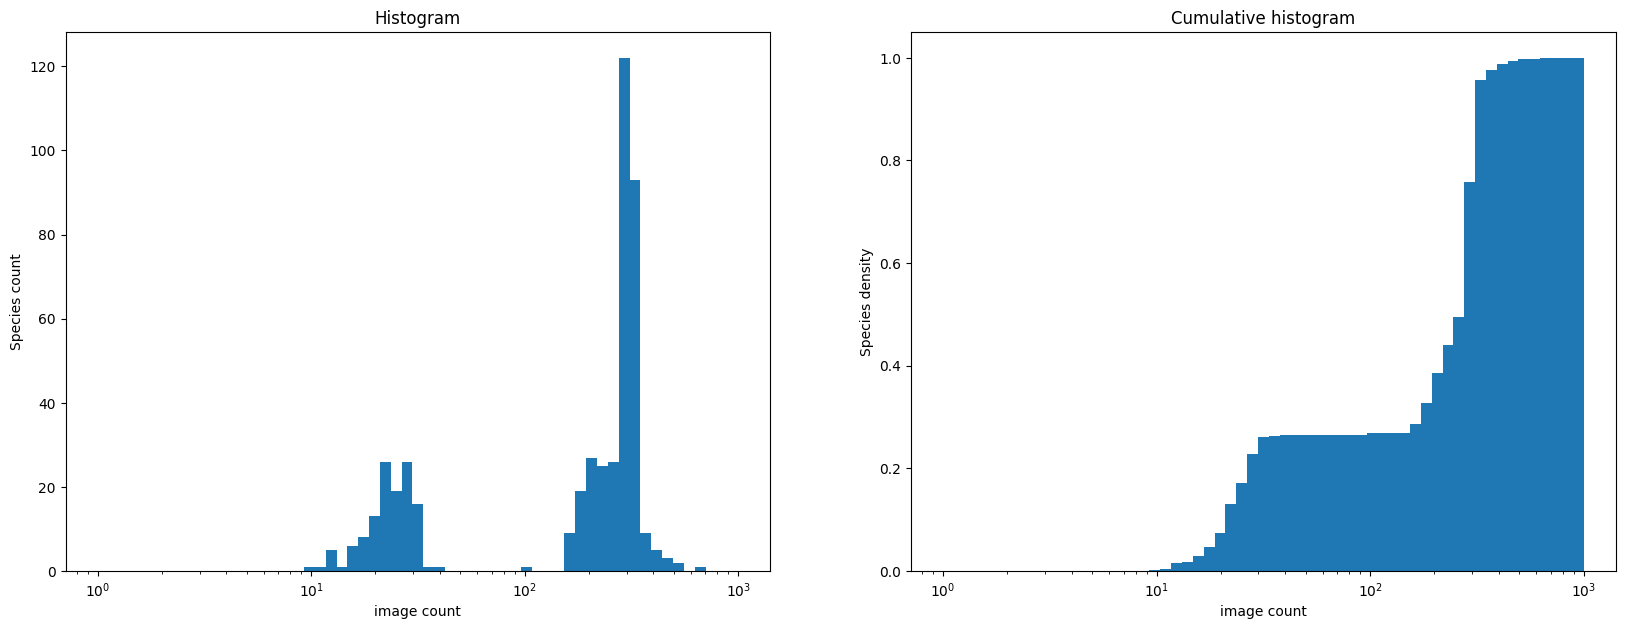

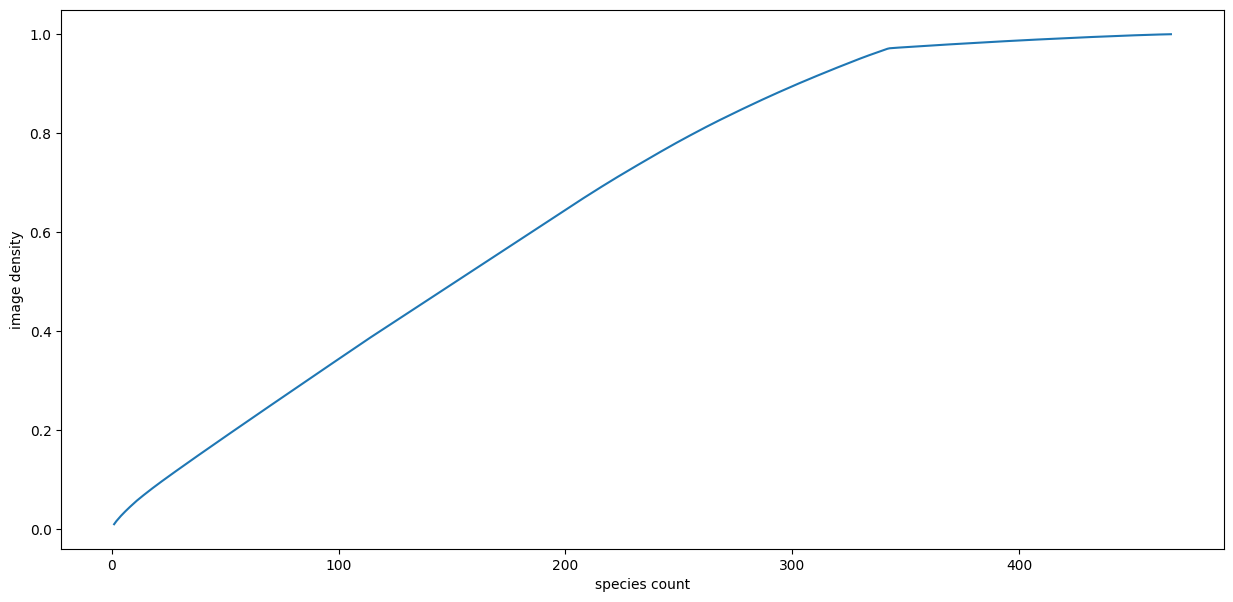

In [23]:
species2counts = df.groupby("class_id").count().sort_values("file_name")
to_plot = species2counts["file_name"].values

species2counts2 = df.groupby("class_id").count().sort_values("file_name", ascending=False)
to_plot2 = species2counts2["file_name"].values

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].hist(to_plot, bins=np.logspace(0, 3, num=60))
ax[1].hist(to_plot, bins=np.logspace(0, 3, num=60), cumulative=True, density=True)
for a in ax.flatten():
    a.set_xlabel("image count")
    a.set_xscale('log')
ax[0].set_title("Histogram"), ax[1].set_title("Cumulative histogram")
ax[0].set_ylabel("Species count"), ax[1].set_ylabel("Species density")

plt.show()

plt.figure(figsize=(15, 7))

plt.plot(np.arange(len(to_plot2)) + 1, to_plot2.cumsum() / to_plot2.sum())
plt.xlabel("species count")
plt.ylabel("image density")

plt.show()